In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ic/Dados limpos/resultados/complete_atributes_with_diag.csv')
df = df.iloc[:,1:]
df.head()

,Unnamed: 0.1,Diags,rs10127904_1,rs10127904_2,rs10127904_3,rs10194375_1,rs10194375_2,rs10194375_3,rs10200967_1,rs10200967_2,rs10200967_3,rs10419707_1,rs10419707_2,rs10419707_3,rs10501602_1,rs10501602_2,rs10501602_3,rs10501604_1,rs10501604_2,rs10501604_3,rs10501608_1,rs10501608_2,rs10501608_3,rs10503814_2,rs10503814_3,rs10779339_1,rs10779339_2,rs10779339_3,rs10792820_1,rs10792820_2,rs10792820_3,rs10792821_1,rs10792821_2,rs10792821_3,rs10898427_1,rs10898427_2,rs10898427_3,rs10948367_1,rs10948367_2,rs10948367_3,...,rs7938033_2,rs7938033_3,rs873270_1,rs873270_2,rs873270_3,rs880436_1,rs880436_2,rs880436_3,rs9296559_1,rs9296559_2,rs9296559_3,rs9296562_1,rs9296562_2,rs9296562_3,rs9296568_1,rs9296568_2,rs9296568_3,rs9314349_1,rs9314349_2,rs9314349_3,rs934826_1,rs934826_2,rs934826_3,rs9349417_1,rs9349417_2,rs9349417_3,rs9395267_1,rs9395267_2,rs9395267_3,rs9395285_1,rs9395285_2,rs9395285_3,rs9473121_1,rs9473121_2,rs9473121_3,rs988337_1,rs10503814_1,rs11230195_3,rs12094477_3,rs17047502_2
0,002_S_0295,CN,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,NaN,NaN,NaN,NaN
1,002_S_0413,CN,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,NaN,NaN,NaN,NaN
2,002_S_0559,CN,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,NaN,NaN,NaN,NaN
3,002_S_0619,AD,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,NaN,NaN,NaN,NaN
4,002_S_0685,CN,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Columns: 359 entries, Unnamed: 0.1 to rs17047502_2
dtypes: float64(7), int64(350), object(2)
memory usage: 2.1+ MB


**Lembrete**  
AD $\rightarrow$ Alzheimer Desease  
CN $\rightarrow$  Cognitively Normal  
MCI $\rightarrow$ Mild Cognitive Impairment

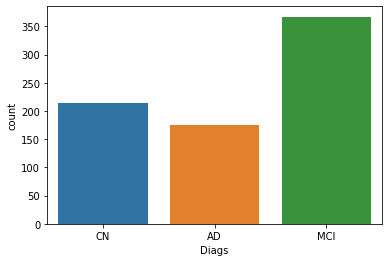

In [4]:
sns.countplot(x='Diags',data=df)

In [5]:
df.iloc[533:534,:]

,Unnamed: 0.1,Diags,rs10127904_1,rs10127904_2,rs10127904_3,rs10194375_1,rs10194375_2,rs10194375_3,rs10200967_1,rs10200967_2,rs10200967_3,rs10419707_1,rs10419707_2,rs10419707_3,rs10501602_1,rs10501602_2,rs10501602_3,rs10501604_1,rs10501604_2,rs10501604_3,rs10501608_1,rs10501608_2,rs10501608_3,rs10503814_2,rs10503814_3,rs10779339_1,rs10779339_2,rs10779339_3,rs10792820_1,rs10792820_2,rs10792820_3,rs10792821_1,rs10792821_2,rs10792821_3,rs10898427_1,rs10898427_2,rs10898427_3,rs10948367_1,rs10948367_2,rs10948367_3,...,rs7938033_2,rs7938033_3,rs873270_1,rs873270_2,rs873270_3,rs880436_1,rs880436_2,rs880436_3,rs9296559_1,rs9296559_2,rs9296559_3,rs9296562_1,rs9296562_2,rs9296562_3,rs9296568_1,rs9296568_2,rs9296568_3,rs9314349_1,rs9314349_2,rs9314349_3,rs934826_1,rs934826_2,rs934826_3,rs9349417_1,rs9349417_2,rs9349417_3,rs9395267_1,rs9395267_2,rs9395267_3,rs9395285_1,rs9395285_2,rs9395285_3,rs9473121_1,rs9473121_2,rs9473121_3,rs988337_1,rs10503814_1,rs11230195_3,rs12094477_3,rs17047502_2
533,100_S_1226,NaN,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0.0,0.0,0.0,0.0


In [6]:
df.drop(labels=533,inplace=True)
df.fillna(0, inplace = True)
df

,Unnamed: 0.1,Diags,rs10127904_1,rs10127904_2,rs10127904_3,rs10194375_1,rs10194375_2,rs10194375_3,rs10200967_1,rs10200967_2,rs10200967_3,rs10419707_1,rs10419707_2,rs10419707_3,rs10501602_1,rs10501602_2,rs10501602_3,rs10501604_1,rs10501604_2,rs10501604_3,rs10501608_1,rs10501608_2,rs10501608_3,rs10503814_2,rs10503814_3,rs10779339_1,rs10779339_2,rs10779339_3,rs10792820_1,rs10792820_2,rs10792820_3,rs10792821_1,rs10792821_2,rs10792821_3,rs10898427_1,rs10898427_2,rs10898427_3,rs10948367_1,rs10948367_2,rs10948367_3,...,rs7938033_2,rs7938033_3,rs873270_1,rs873270_2,rs873270_3,rs880436_1,rs880436_2,rs880436_3,rs9296559_1,rs9296559_2,rs9296559_3,rs9296562_1,rs9296562_2,rs9296562_3,rs9296568_1,rs9296568_2,rs9296568_3,rs9314349_1,rs9314349_2,rs9314349_3,rs934826_1,rs934826_2,rs934826_3,rs9349417_1,rs9349417_2,rs9349417_3,rs9395267_1,rs9395267_2,rs9395267_3,rs9395285_1,rs9395285_2,rs9395285_3,rs9473121_1,rs9473121_2,rs9473121_3,rs988337_1,rs10503814_1,rs11230195_3,rs12094477_3,rs17047502_2
0,002_S_0295,CN,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
1,002_S_0413,CN,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
2,002_S_0559,CN,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0.0,0.0,0.0,0.0
3,002_S_0619,AD,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0.0,0.0,0.0,0.0
4,002_S_0685,CN,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,941_S_1202,CN,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0.0,0.0,0.0,0.0
753,941_S_1203,CN,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
754,941_S_1295,MCI,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0.0,0.0,0.0,0.0
755,941_S_1311,MCI,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0.0,0.0,0.0,0.0


In [7]:
df[df['Diags']==0]

,Unnamed: 0.1,Diags,rs10127904_1,rs10127904_2,rs10127904_3,rs10194375_1,rs10194375_2,rs10194375_3,rs10200967_1,rs10200967_2,rs10200967_3,rs10419707_1,rs10419707_2,rs10419707_3,rs10501602_1,rs10501602_2,rs10501602_3,rs10501604_1,rs10501604_2,rs10501604_3,rs10501608_1,rs10501608_2,rs10501608_3,rs10503814_2,rs10503814_3,rs10779339_1,rs10779339_2,rs10779339_3,rs10792820_1,rs10792820_2,rs10792820_3,rs10792821_1,rs10792821_2,rs10792821_3,rs10898427_1,rs10898427_2,rs10898427_3,rs10948367_1,rs10948367_2,rs10948367_3,...,rs7938033_2,rs7938033_3,rs873270_1,rs873270_2,rs873270_3,rs880436_1,rs880436_2,rs880436_3,rs9296559_1,rs9296559_2,rs9296559_3,rs9296562_1,rs9296562_2,rs9296562_3,rs9296568_1,rs9296568_2,rs9296568_3,rs9314349_1,rs9314349_2,rs9314349_3,rs934826_1,rs934826_2,rs934826_3,rs9349417_1,rs9349417_2,rs9349417_3,rs9395267_1,rs9395267_2,rs9395267_3,rs9395285_1,rs9395285_2,rs9395285_3,rs9473121_1,rs9473121_2,rs9473121_3,rs988337_1,rs10503814_1,rs11230195_3,rs12094477_3,rs17047502_2


In [8]:
y = df['Diags']
y = y.str.get_dummies()

In [9]:
y

,AD,CN,MCI
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
752,0,1,0
753,0,1,0
754,0,0,1
755,0,0,1


In [10]:
X = df.iloc[:,2:]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
X_train

,rs10127904_1,rs10127904_2,rs10127904_3,rs10194375_1,rs10194375_2,rs10194375_3,rs10200967_1,rs10200967_2,rs10200967_3,rs10419707_1,rs10419707_2,rs10419707_3,rs10501602_1,rs10501602_2,rs10501602_3,rs10501604_1,rs10501604_2,rs10501604_3,rs10501608_1,rs10501608_2,rs10501608_3,rs10503814_2,rs10503814_3,rs10779339_1,rs10779339_2,rs10779339_3,rs10792820_1,rs10792820_2,rs10792820_3,rs10792821_1,rs10792821_2,rs10792821_3,rs10898427_1,rs10898427_2,rs10898427_3,rs10948367_1,rs10948367_2,rs10948367_3,rs11084060_1,rs11084060_2,...,rs7938033_2,rs7938033_3,rs873270_1,rs873270_2,rs873270_3,rs880436_1,rs880436_2,rs880436_3,rs9296559_1,rs9296559_2,rs9296559_3,rs9296562_1,rs9296562_2,rs9296562_3,rs9296568_1,rs9296568_2,rs9296568_3,rs9314349_1,rs9314349_2,rs9314349_3,rs934826_1,rs934826_2,rs934826_3,rs9349417_1,rs9349417_2,rs9349417_3,rs9395267_1,rs9395267_2,rs9395267_3,rs9395285_1,rs9395285_2,rs9395285_3,rs9473121_1,rs9473121_2,rs9473121_3,rs988337_1,rs10503814_1,rs11230195_3,rs12094477_3,rs17047502_2
698,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,...,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0.0,0.0,0.0,0.0
342,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,...,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
3,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,...,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0.0,0.0,0.0,0.0
449,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0.0,0.0,0.0,0.0
144,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,...,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,...,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0.0,0.0,0.0,0.0
200,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,...,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0.0,0.0,0.0,0.0
476,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
434,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,...,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0.0,0.0,0.0,0.0


In [13]:
y_train_AD = y_train['AD']
y_train_AD

698    0
342    1
3      1
449    0
144    0
      ..
105    0
200    0
476    0
434    0
296    0
Name: AD, Length: 567, dtype: int64

In [14]:
lm = LogisticRegression()
lm.fit(X_train,y_train_AD)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
from sklearn.metrics import mean_squared_error
print("------------------------------------------------------")
print('Mean Squared Error:')
print(mean_squared_error(y_test['AD'],y_predict))
print("------------------------------------------------------")
print('Score: ')
print(lm.score(X_test,y_test['AD']) )


------------------------------------------------------
Mean Squared Error:
0.3333333333333333
------------------------------------------------------
Score: 
0.6666666666666666
